<h1 style="color: #49BFCF; font-family: serif;text-align: center"> MySQL et Python</h1>

<h1 style="color: #49BFCF; font-family: serif;">Sommaire</h1>


<a style="color: #49BFCF;" href="#C2">1. Contexte et présentation du projet</a>

- Contexte 
- Objectif 

<a style="color: #49BFCF;" href="#C3">2. Besoins et contraintes liés au projet</a>

- Technologies utilisées
- Contraintes 	
    
    
       
<a style="color: #49BFCF;" href="#C1">3. Jupyter Notebook</a>

- <a style="color: #49BFCF;" href="#C4"> Creation de la base de données 'compagny_data'</a>
- <a style="color: #49BFCF;" href="#C5">table warehouse  </a>
- <a style="color: #49BFCF;" href="#C6">table customer  </a>
- <a style="color: #49BFCF;" href="#C7">table product</a>
- <a style="color: #49BFCF;" href="#C9">Table agent</a>
- <a style="color: #49BFCF;" href="#C8">Table delivery_cost</a>
- <a style="color: #49BFCF;" href="#C10">Table orders</a>





# <a style="color: #49BFCF" name="C2">1.Contexte et présentation du projet</a>
<h1 style="color: #49BFCF;font-size:30px; font-family: serif;"><strong>1.1 Contexte</strong></h1>
Ceci est le deuxième partie d'un projet de création d'un admin dashboard en utilisant le framework djando.

Dans ce Notebook, nous aborderons:
*   La creation d'une base de données dans MySQL
*   Le transfert des données vers MySQL

**Etapes du projet django:**

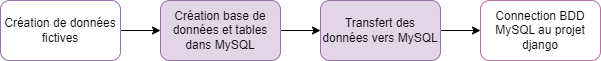

In [ ]:
from IPython.display import Image
Image("projet.drawio (1).png")

Pour accéder à la première étape de ce projet: la création des données cliquez ici [lien](https://github.com/EveLucie/Projet_faker/blob/main/projet_faker.ipynb)

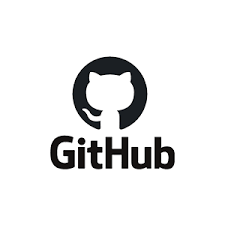

<h1 style="color: #49BFCF;font-size:30px; font-family: serif;"><strong>1.2 Objectif</strong></h1> 

Importez le fichier CSV dans le DataFrame.
* Connection à MySQL en utilisant Python et créer la base de données 'compagny_data'
* Créer une table et importer les données CSV dans la table MySQL
* Creation du trigger BEFORE INSERT
* Verifier si trigger fonctionne en inserant nouvelle valeur
* Interroger la table 

Diagramme final de la base de données compagny_data et les tables 

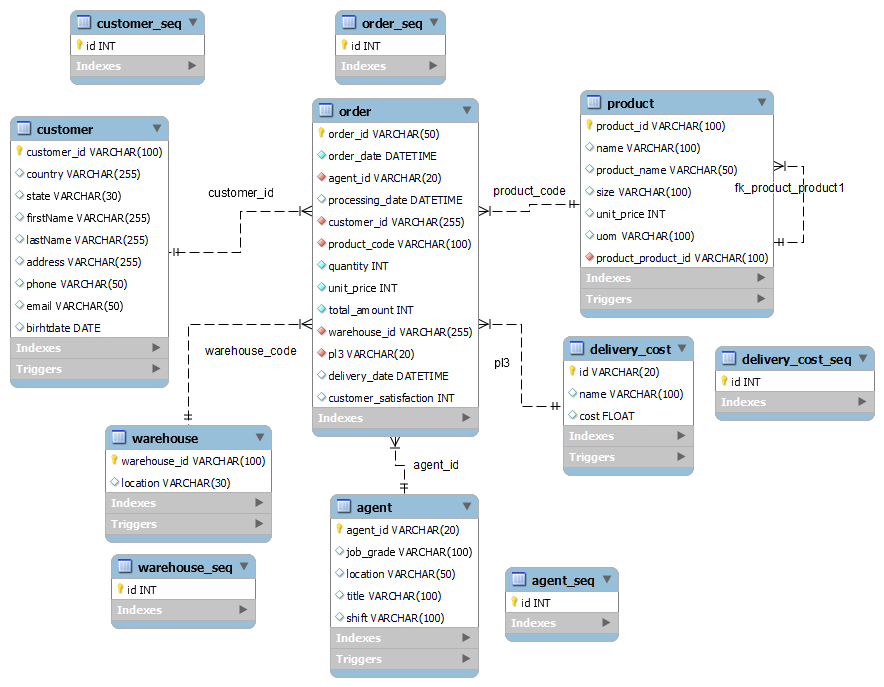

In [ ]:
from IPython.display import Image
Image("diag.png")



# <a style="color: #49BFCF;" name="C3">2. Besoins et contraintes liés au projet</a>

<h1 style="color: #49BFCF;font-size:30px; font-family: serif;"><strong>2.1 Technologies utilisées</strong></h1>
Pour l’analyse et le traitement des données, on utilisera:

* Le language SQL
* Le langage python en utilisant les 2 bibliothèques suivantes :

    *  Pandas: permet la manipulation et l'analyse des données 
    *  mysql-connector-python:Python a besoin d'un pilote MySQL pour accéder et communiquer avec le serveur MySQL.





<h1 style="color: #49BFCF;font-size:30px; font-family: serif;"><strong>2.2 Contraintes</strong></h1>

Respecter la PEP 8 pour les noms des variables, classes, méthodes… https://realpython.com/python-pep8/#naming-styles 



<h1 style="color: #49BFCF;font-size:25px; font-family: serif;"><strong>Comment se connecter à MySQL?</strong></h1>

**Pour connecter Python au serveur SQL, nous avons besoin:**
- Nom du serveur 
- Nom de la base de données 

- Installer le module de connecteur MySQL
    * Utilisez la commande pip pour installer le connecteur MySQL Python:  pip install mysql-connector-python

- Utiliser la connect() méthode de la classe MySQL Connector avec les arguments requis. Il renverrait un MySQL Connection objet si la connexion était établie avec succès

- Utilisez la méthode curseur() d'un MySQLConnection objet pour créer un objet curseur afin d'effectuer diverses opérations SQL.

- Utilisez la méthode execute()
    * Les méthodes execute() exécutent la requête SQL et renvoient le résultat.

- Extraire le résultat en utilisant cursor.fetchall() pour lire le résultat de la requête.

- Fermer le curseur et les objets de connexion
    * Utilisation de cursor.close()et connection.close() méthode pour fermer les connexions ouvertes.


<h1 style="color: #49BFCF;font-size:25px; font-family: serif;"><strong>Comment incrémenter automatiquement les numéros d'identification(PRIMARY KEY) avec des lettres et des chiffres.</strong></h1>

**SQL PRIMARY KEY**
Dans le langage SQL la “PRIMARY KEY”, ou clé primaire, permet d’identifier chaque enregistrement dans une table de base de données. Chaque enregistrement de cette clé primaire doit être UNIQUE et ne doit pas contenir de valeur NULL.
La clé primaire est un index, chacune des tables ne peut contenir qu’une seule clé primaire, composée d’une ou plusieurs colonnes.
L’usage le plus fréquent consiste à créer une colonne numérique qui s’incrémente automatiquement à chaque enregistrement grâce à AUTO_INCREMENT.

**SQL AUTO_INCREMENT**

La commande AUTO_INCREMENT est utilisée dans le langage SQL afin de spécifier qu’une colonne numérique avec une clé primaire (PRIMARY KEY) sera incrémentée automatiquement à chaque ajout d’enregistrement dans celle-ci.

**Créér un trigger**(point de déclenchement) afin de concaténer l'id numérique créé et le préfixe correspondant à chaque table.

Un trigger (ou déclencheur) est une commande SQL définie par l'utilisateur qui est automatiquement invoquée lors d'une opération INSERT , DELETE ou UPDATE 

**CONCAT_WS:** est une fonction SQL qui ajoute deux ou plusieurs expressions avec un séparateur.Dans cette requete le séparateur est "-".

**La fonction LPAD()** permet de compléter une chaîne de caractère jusqu’à ce qu’elle atteigne la taille souhaitée, en ajoutant des caractères au début de cette chaîne.

La fonction LPAD() s’utilise avec 2 ou 3 paramètres. Le premier paramètre correspond à la chaîne de caractères d’entrée(LAST_INSERT=dernière ligne inséré), le second paramètre définie la longueur souhaitée. Finalement, le 3ème paramètre correspond à la chaîne de complétion

**Exemple:**

**SELECT CONCAT_WS("-",'WH', warehouse_id) as warehouse_id,location  FROM compagny_data.warehouse**

<h1 style="color: #49BFCF;font-size:25px; font-family: serif;"><strong>Créer une connection entre la table principale 'orders' et les autres tables de la base de données 'compagny_data'.</strong></h1>

Lors de la création de la table 'orders' nous utiliserons des foreign key.
La clé étrangère est utilisée pour lier une ou plusieurs tables ensemble. Une clé étrangère correspond au champ de clé primaire d'une autre table. Cela signifie qu'un champ de clé étrangère dans une table fait référence au champ de clé primaire de l'autre table. Il identifie chaque ligne d'une autre table de manière unique qui maintient l' intégrité référentielle dans MySQL.
CASCADE : Il est utilisé lorsque nous supprimons ou mettons à jour une ligne de la table parent, les valeurs des lignes correspondantes dans la table enfant seront supprimées ou mises à jour automatiquement.

**exemple:**

 **CONSTRAINT `agent_id` FOREIGN KEY (`agent_id`) REFERENCES `agent` (`agent_id`) ON DELETE CASCADE ON UPDATE CASCADE,**
 
 <h1 style="color: #49BFCF;font-size:25px; font-family: serif;"><strong>Création d'une colonne 'unit_price'</strong></h1>

Récupération du prix unitaire 'unit_price' dans la table 'product' en effectuant une jointure entre les deux tables.

UPDATE compagny_data.orders INNER JOIN product ON compagny_data.orders.product_id = product.product_id SET compagny_data.orders.unit_price= product.unit_price


<h1 style="color: #49BFCF;font-size:25px; font-family: serif;"><strong>Création de la colonne Total amout</strong></h1>

Utilisation de la commande UPDATE pour mettre à jour la table 'orders'.
Jointure avec table 'product' pour récupérer unit_price et le multiplier avec la colonne quantité de la table 'orders'






# <a style="color: #49BFCF;" name="C1">3. Jupyter Notebook</a>

Installation du module connecteur à MySQL
<h1 style="color: #49BFCF;font-size:25px; font-family: serif;"><strong>Comment se connecter à MySQL?</strong></h1>

In [ ]:
pip install mysql-connector-python


# <a style="color: #49BFCF;font-size:30px; font-family: serif;" name="C4">Creation de la base de données 'compagny_data'</a>


Utiliser le nom d'utilisateur et le mot de passe de la base de données MySQL

Le constructeur connect() crée une connexion et renvoie un objet MySQLConnection.

In [ ]:
import mysql.connector as msql
from mysql.connector import Error
try:
    conn = msql.connect(host='localhost', user='root',  
                        password='Shiva2370@')#give ur username, password
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("CREATE DATABASE compagny_data")
        print("Database is created")
except Error as e:
    print("Error while connecting to MySQL", e)
finally:
    if conn.is_connected():
        cursor.close()
        conn.close()
        print("MySQL connection is closed")




# <a style="color: #49BFCF" name="C5">Table 'warehouse'</a>

<h1 style="color: #49BFCF;font-size:25px; font-family: serif;">Importez le fichier CSV dans un DataFrame</h1>

In [ ]:
import pandas as pd


df=pd.read_csv('warehouse.csv', sep=';')
df.rename(columns={"Code":"code","Warehouse Code": "warehouse_id","Warehouse Location":"location"}, inplace=True)
df

,warehouse_id,location
0,WH-001,California
1,WH-002,Georgia
2,WH-003,New York
3,WH-004,Illinois



<h1 style="color: #49BFCF;font-size:25px; font-family: serif;">Extration id</h1>

Creation d'un deuxième dataframe df1 afin d'extraire le préfix et le code

In [ ]:
df1=pd.read_csv('warehouse.csv', sep=';')
#Renommer les colonnes
df1.rename(columns={"Code":"code","Warehouse Code": "warehouse_id","Warehouse Location":"location"}, inplace=True)
df1[['prefix','code']] = df1['warehouse_id'].str.split('-',expand=True)
df1

,warehouse_id,location,prefix,code
0,WH-001,California,WH,001
1,WH-002,Georgia,WH,002
2,WH-003,New York,WH,003
3,WH-004,Illinois,WH,004


In [ ]:
df1= pd.DataFrame(df1['code'])
df1

,code
0,001
1,002
2,003
3,004


<h1 style="color: #49BFCF;font-size:25px; font-family: serif;">Créer une table et importer les données CSV dans la table MySQL</h1>


Nous allons créer une table warehouse sous la base de données 'compagny_data' et insérer les enregistrements dans MySQL avec le code python ci-dessous.

In [23]:
import mysql.connector as msql
from mysql.connector import Error
try:
    conn = msql.connect(host='localhost', database='compagny_data', user='root', password='Shiva2370@')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
        cursor.execute('DROP TABLE IF EXISTS warehouse;')
        print('Creating table....')
# in the below line please pass the create table statement which you want #to create
        cursor.execute("CREATE TABLE warehouse( warehouse_id VARCHAR(100) NOT NULL PRIMARY KEY DEFAULT '0', location VARCHAR(30))")
    
        print("Table warehouse is created....")
        #loop through the data frame
        cursor.execute("CREATE TABLE warehouse_seq(id INT NOT NULL AUTO_INCREMENT PRIMARY KEY)")
    
        print("Table is created....")
        
        for i,row in df.iterrows():
            #here %S means string values 
            sql = "INSERT INTO compagny_data.warehouse VALUES (%s,%s)"
            cursor.execute(sql, tuple(row))
            print("Record inserted")
            # the connection is not auto committed by default, so we must commit to save our changes
            conn.commit()
        for i,row in df1.iterrows():
            #here %S means string values 
            sql = "INSERT INTO compagny_data.warehouse_seq VALUES (%s)"
            cursor.execute(sql, tuple(row))
            print("Record inserted")
            # the connection is not auto committed by default, so we must commit to save our changes
            conn.commit()
        
except Error as e:
            print("Error while connecting to MySQL", e)

You're connected to database:  ('compagny_data',)
Creating table....
Table warehouse is created....
Table is created....
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted


Ici, le code SQL équivalent


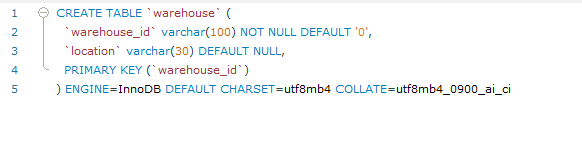

In [6]:
from IPython.display import Image
Image("table_warehouse.png")

<h1 style="color: #49BFCF;font-size:25px; font-family: serif;">Creation du trigger BEFORE INSERT</h1>


In [12]:
#trigger
import mysql.connector as msql
from mysql.connector import Error
conn = msql.connect(host='localhost', database='compagny_data', user='root', password='Shiva2370@')
if conn.is_connected():
    cursor = conn.cursor()
    cursor.execute("select database();")
    record = cursor.fetchone()
    print("You're connected to database: ", record)
cursor.execute('''
CREATE TRIGGER tg_warehouse_insert_id BEFORE INSERT ON warehouse 
FOR EACH ROW BEGIN INSERT INTO warehouse_seq VALUES (NULL); 
SET NEW.warehouse_id = CONCAT_WS('-','WH', LPAD(LAST_INSERT_ID(), 3, '0')); END''')
    
print("Trigger is created....")

You're connected to database:  ('compagny_data',)
Trigger is created....


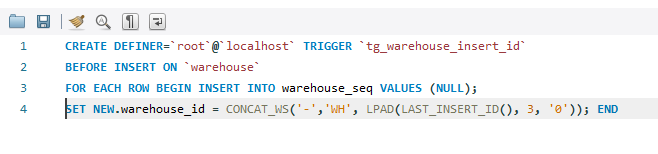

In [7]:
from IPython.display import Image
Image("trigger_warehouse.png")

<h1 style="color: #49BFCF;font-size:25px; font-family: serif;">Interroger la table</h1>

Afin de s'assurer que les données insérées ont été enregistrées correctement.


 Interroger la table: **SELECT * FROM compagny_data.warehouse**

In [33]:
import mysql.connector as msql
from mysql.connector import Error
conn = msql.connect(host='localhost', database='compagny_data', user='root', password='Shiva2370@')
if conn.is_connected():
    cursor = conn.cursor()
    cursor.execute("select database();")
    record = cursor.fetchone()
    
# Execute query
sql = "SELECT * FROM compagny_data.warehouse"
cursor.execute(sql)
# Fetch all the records
result = cursor.fetchall()
for i in result:
    print(i)

('WH-001', 'California')
('WH-002', 'Georgia')
('WH-003', 'New York')
('WH-004', 'Illinois')


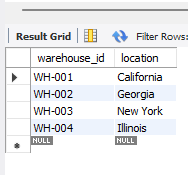

In [9]:
from IPython.display import Image
Image("cap.png")

<h1 style="color: #49BFCF;font-size:25px; font-family: serif;">Verifier si le trigger fonctionne en inserant une nouvelle valeur avec la commande INSERT INTO</h1>

In [7]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="Shiva2370@",
  database='compagny_data'
)

mycursor = mydb.cursor()

sql = "INSERT INTO warehouse (location) VALUES ('France')"


mycursor.execute(sql)

mydb.commit()

print(mycursor.rowcount, "record inserted.")

1 record inserted.


<h1 style="color: #49BFCF;font-size:25px; font-family: serif;">Interroger la table pour voir si warehouse_id a bien été incrementé</h1>

In [30]:
import mysql.connector as msql
from mysql.connector import Error
conn = msql.connect(host='localhost', database='compagny_data', user='root', password='Shiva2370@')
if conn.is_connected():
    cursor = conn.cursor()
    cursor.execute("select database();")
    record = cursor.fetchone()
    print("You're connected to database: ", record)
# Execute query
sql = "SELECT * FROM compagny_data.warehouse"
cursor.execute(sql)
# Fetch all the records
result = cursor.fetchall()
for i in result:
    print(i)

You're connected to database:  ('compagny_data',)
('WH-001', 'California')
('WH-002', 'Georgia')
('WH-003', 'New York')
('WH-004', 'Illinois')
('WH-005', 'France')


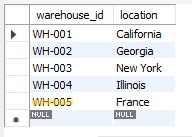

In [10]:
from IPython.display import Image
Image("warehouse1.png")


# <a style="color: #49BFCF" name="C6">Table Customer</a>
<h1 style="color: #49BFCF;font-size:25px; font-family: serif;">Importez le fichier CSV dans un DataFrame.</h1>

In [ ]:
import pandas as pd

df=pd.read_csv('customer_faker.csv', sep=';')

df.head()


<h1 style="color: #49BFCF;font-size:25px; font-family: serif;">Extration id</h1>

In [ ]:
df1=pd.read_csv('customer_faker.csv', sep=';')

df1[['prefix','pref','code']] = df1['customer_no'].str.split('-',expand=True)
df1.head()

In [ ]:
df1= pd.DataFrame(df1['code'])
df1

,code
0,1248
1,1249
2,1250
3,1251
4,1252
...,...
1760,3008
1761,3009
1762,3010
1763,3011


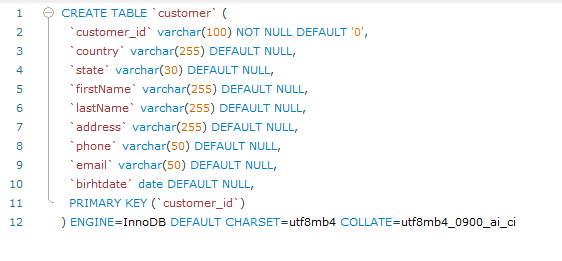

In [11]:
from IPython.display import Image
Image("table_customer.png")

<h1 style="color: #49BFCF;font-size:25px; font-family: serif;">Création table 'customer' et importer les données CSV dans la table MySQL</h1>

In [ ]:
import mysql.connector as msql
from mysql.connector import Error
try:
    conn = msql.connect(host='localhost', database='compagny_data', user='root', password='Shiva2370@')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
        cursor.execute('DROP TABLE IF EXISTS customer;')
        print('Creating table....')
# in the below line please pass the create table statement which you want #to create
        cursor.execute('''CREATE TABLE customer(
        customer_id VARCHAR(100) NOT NULL PRIMARY KEY DEFAULT '0', 
        country varchar(255), state VARCHAR(30), 
        firstName varchar(255), 
        lastName varchar(255),
        address varchar(255), 
        phone VARCHAR(50), 
        email varchar(50),
        birhtdate DATE)''')
    
        print("Table is created....")
        for i,row in df.iterrows():
            #here %S means string values 
            sql = "INSERT INTO compagny_data.customer VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s)"
            cursor.execute(sql, tuple(row))
            
            # the connection is not auto committed by default, so we must commit to save our changes
            conn.commit()
        print('Record inserted....')    
        #loop through the data frame
        cursor.execute("CREATE TABLE customer_seq(id INT NOT NULL AUTO_INCREMENT PRIMARY KEY)")
    
        print("Table customer_seq is created....")
        for i,row in df1.iterrows():
            #here %S means string values 
            sql = "INSERT INTO compagny_data.customer_seq VALUES (%s)"
            cursor.execute(sql, tuple(row))
            # the connection is not auto committed by default, so we must commit to save our changes
            conn.commit()
        print("Record inserted")
        
except Error as e:
            print("Error while connecting to MySQL", e)


#created:update

You're connected to database:  ('compagny_data',)
Creating table....
Table is created....
Record inserted....
Table customer_seq is created....
Record inserted


<h1 style="color: #49BFCF;font-size:25px; font-family: serif;">Creation du trigger</h1>


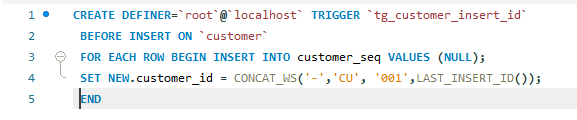

In [12]:
from IPython.display import Image
Image("trigger_customer.png")

In [ ]:
#trigger
import mysql.connector as msql
from mysql.connector import Error
conn = msql.connect(host='localhost', database='compagny_data', user='root', password='Shiva2370@')
if conn.is_connected():
    cursor = conn.cursor()
    cursor.execute("select database();")
    record = cursor.fetchone()
    print("You're connected to database: ", record)
cursor.execute('''CREATE TRIGGER tg_customer_insert_id BEFORE INSERT ON customer 
                FOR EACH ROW BEGIN INSERT INTO customer_seq VALUES (NULL); 
                SET NEW.customer_id = CONCAT_WS('-','CU', '001',LAST_INSERT_ID()); END''')
    
print("Trigger tg_customer_insert_id is created....")



You're connected to database:  ('compagny_data',)
Trigger tg_customer_insert_id is created....


In [ ]:
from IPython.display import Image
Image("trigger_customer.png")


<h1 style="color: #49BFCF;font-size:25px; font-family: serif;">Verifie si le trigger fonctionne en inserant nouvelle valeur avec commande INSERT INTO</h1>

Test incrementation

![Alt text](insert.png)

In [ ]:
from IPython.display import Image
Image("trigger_customer.png")

![Alt text](customeer_insert.png)



# <a style="color: #49BFCF" name="C7">Table Product </a>


<h1 style="color: #49BFCF;font-size:25px; font-family: serif;">Importez le fichier CSV dans un DataFrame.</h1>

In [ ]:
import pandas as pd

df=pd.read_csv('products.csv', sep=';')

df

,Product Code,name,Product Name,Size,Unit Price,UOM
0,PR-143-1082,Adidas Shoe,Adidas Shoe Size 38,38,916,Piece
1,PR-143-1083,Adidas Shoe,Adidas Shoe Size 39,39,1001,Piece
2,PR-143-1084,Adidas Shoe,Adidas Shoe Size 40,40,1165,Piece
3,PR-143-1085,Adidas Shoe,Adidas Shoe Size 41,41,1179,Piece
4,PR-143-1086,Ballet Shoe,Ballet Shoe Size 38,38,1094,Piece
...,...,...,...,...,...,...
123,PR-143-1205,High-heeled Shoe,High-heeled Shoe Size 41,41,1055,Piece
124,PR-143-1206,Pointe Shoe,Pointe Shoe Size 38,38,908,Piece
125,PR-143-1207,Pointe Shoe,Pointe Shoe Size 39,39,1071,Piece
126,PR-143-1208,Pointe Shoe,Pointe Shoe Size 40,40,1090,Piece



<h1 style="color: #49BFCF;font-size:25px; font-family: serif;">Extration id</h1>

In [ ]:
df1=pd.read_csv('products.csv', sep=';')

df1[['prefix','pref','code']] = df1['Product Code'].str.split('-',expand=True)
df1.head()

,Product Code,name,Product Name,Size,Unit Price,UOM,prefix,pref,code
0,PR-143-1082,Adidas Shoe,Adidas Shoe Size 38,38,916,Piece,PR,143,1082
1,PR-143-1083,Adidas Shoe,Adidas Shoe Size 39,39,1001,Piece,PR,143,1083
2,PR-143-1084,Adidas Shoe,Adidas Shoe Size 40,40,1165,Piece,PR,143,1084
3,PR-143-1085,Adidas Shoe,Adidas Shoe Size 41,41,1179,Piece,PR,143,1085
4,PR-143-1086,Ballet Shoe,Ballet Shoe Size 38,38,1094,Piece,PR,143,1086


In [ ]:
df1= pd.DataFrame(df1['code'])
df1

,code
0,1082
1,1083
2,1084
3,1085
4,1086
...,...
123,1205
124,1206
125,1207
126,1208


<h1 style="color: #49BFCF;font-size:25px; font-family: serif;">Création table et importer les données CSV dans la table MySQL</h1>

In [ ]:
import mysql.connector as msql
from mysql.connector import Error
try:
    conn = msql.connect(host='localhost', database='compagny_data', user='root', password='Shiva2370@')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
        cursor.execute('DROP TABLE IF EXISTS product;')
        print('Creating table....')
# in the below line please pass the create table statement which you want #to creatPRIMARY KEYe
        cursor.execute('''CREATE TABLE product
        ( product_id VARCHAR(100) NOT NULL PRIMARY KEY DEFAULT '0', 
        name varchar(100), 
        product_name VARCHAR(30), 
        size varchar(100), 
        unit_price INT NULL, 
        uom VARCHAR(100))''')
    
        print("Table is created....")
        for i,row in df.iterrows():
            #here %S means string values 
            sql = "INSERT INTO compagny_data.product VALUES (%s,%s,%s,%s,%s,%s)"
            cursor.execute(sql, tuple(row))
            
            # the connection is not auto committed by default, so we must commit to save our changes
            conn.commit()
        #loop through the data frame
        cursor.execute("CREATE TABLE product_seq(id INT NOT NULL AUTO_INCREMENT PRIMARY KEY)")
    
        print("Table is created....")
        for i,row in df1.iterrows():
            #here %S means string values 
            sql = "INSERT INTO compagny_data.product_seq VALUES (%s)"
            cursor.execute(sql, tuple(row))
            
            # the connection is not auto committed by default, so we must commit to save our changes
            conn.commit()
        
        
except Error as e:
            print("Error while connecting to MySQL", e)

You're connected to database:  ('compagny_data',)
Creating table....
Table is created....
Table is created....


<h1 style="color: #49BFCF;font-size:25px; font-family: serif;">Creation du trigger</h1>


In [ ]:
#trigger
import mysql.connector as msql
from mysql.connector import Error
conn = msql.connect(host='localhost', database='compagny_data', user='root', password='Shiva2370@')
if conn.is_connected():
    cursor = conn.cursor()
    cursor.execute("select database();")
    record = cursor.fetchone()
    print("You're connected to database: ", record)
cursor.execute('''CREATE TRIGGER tg_product_insert_id BEFORE INSERT ON product 
                FOR EACH ROW BEGIN INSERT INTO product_seq VALUES (NULL); 
                SET NEW.product_id = CONCAT_WS('-','PR', '143',LAST_INSERT_ID()); END''')
    
print("Trigger tg_product_insert_id is created....")



# <a style="color: #49BFCF" name="C8">Table delivery_cost </a>


<h1 style="color: #49BFCF;font-size:25px; font-family: serif;">Importez le fichier CSV dans un DataFrame.</h1>

In [ ]:
import pandas as pd

df=pd.read_csv('delivery.csv', sep=';')

df


<h1 style="color: #49BFCF;font-size:25px; font-family: serif;">Extration id</h1>

In [ ]:
df1=pd.read_csv('delivery.csv', sep=';')

df1[['prefix','code']] = df1['3PL Code'].str.split('-',expand=True)
df1.head()

,3PL Code,3PL Name,Delivery Cost,prefix,code
0,3PL-001,DHL,10.45,3PL,001
1,3PL-002,FedEx,13.81,3PL,002
2,3PL-003,ShipBob,8.03,3PL,003
3,3PL-004,Rakuten Logistics,12.28,3PL,004


In [ ]:
df1= pd.DataFrame(df1['code'])
df1

,code
0,001
1,002
2,003
3,004


<h1 style="color: #49BFCF;font-size:25px; font-family: serif;">Création table et importer les données CSV dans la table MySQL</h1>

In [ ]:
import mysql.connector as msql
from mysql.connector import Error
try:
    conn = msql.connect(host='localhost', database='compagny_data', user='root', password='Shiva2370@')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
        cursor.execute('DROP TABLE IF EXISTS delivery_cost;')
        print('Creating table....')
# in the below line please pass the create table statement which you want #to creatPRIMARY KEYe
        cursor.execute('''CREATE TABLE delivery_cost
        (`id` varchar(20) NOT NULL DEFAULT '0',
        `name` varchar(100) DEFAULT NULL, 
        `cost` float DEFAULT NULL, 
        PRIMARY KEY (`id`) )''')
    
        print("Table delivery_cost is created....")
        for i,row in df.iterrows():
            #here %S means string values 
            sql = "INSERT INTO compagny_data.delivery_cost VALUES (%s,%s,%s)"
            cursor.execute(sql, tuple(row))
            
            # the connection is not auto committed by default, so we must commit to save our changes
            conn.commit()
        print("data insert into delivery_cost")
        #loop through the data frame
        cursor.execute('DROP TABLE IF EXISTS delivery_seq;')
        cursor.execute("CREATE TABLE delivery_seq(id INT NOT NULL AUTO_INCREMENT PRIMARY KEY)")
    
        print("Table is created....")
        for i,row in df1.iterrows():
            #here %S means string values 
            sql = "INSERT INTO compagny_data.delivery_seq VALUES (%s)"
            cursor.execute(sql, tuple(row))
            
            # the connection is not auto committed by default, so we must commit to save our changes
            conn.commit()
        print("data insert into delivery_seq")
        
except Error as e:
            print("Error while connecting to MySQL", e)

You're connected to database:  ('compagny_data',)
Creating table....
Table delivery_cost is created....
data insert into delivery_cost
data insert into delivery_cost
data insert into delivery_cost
data insert into delivery_cost
Table is created....
data insert into delivery_seq


<h1 style="color: #49BFCF;font-size:25px; font-family: serif;">Creation du trigger</h1>


In [ ]:
import mysql.connector as msql
from mysql.connector import Error
conn = msql.connect(host='localhost', database='compagny_data', user='root', password='Shiva2370@')
if conn.is_connected():
    cursor = conn.cursor()
    cursor.execute("select database();")
    record = cursor.fetchone()
    print("You're connected to database: ", record)
cursor.execute('''CREATE TRIGGER tg_delivery_insert_id BEFORE INSERT ON delivery_cost 
FOR EACH ROW BEGIN INSERT INTO delivery_seq VALUES (NULL); 
SET NEW.id = CONCAT_WS('-','3PL', LPAD(LAST_INSERT_ID(), 3, '0')); END''')
    
print("Trigger tg_delivery_insert_id is created....")

You're connected to database:  ('compagny_data',)
Trigger tg_product_insert_id is created....



# <a style="color: #49BFCF" name="C9">Table agent</a>


<h1 style="color: #49BFCF;font-size:25px; font-family: serif;">Importez le fichier CSV dans un DataFrame.</h1>

In [ ]:
import pandas as pd

df=pd.read_csv('agent.csv', sep=';')

df.head()

,Agent Code,Job Grade,Location,Title,Shift
0,AG-001,JG4,Philippines,Manager,Night
1,AG-002,JG4,India,Manager,Morning
2,AG-003,JG4,Malaysia,Manager,Night
3,AG-004,JG4,Indonesia,Manager,Morning
4,AG-005,JG7,Philippines,Analyst,Night



<h1 style="color: #49BFCF;font-size:25px; font-family: serif;">Extration id</h1>

In [ ]:
df1=pd.read_csv('agent.csv', sep=';')

df1[['prefix','code']] = df1['Agent Code'].str.split('-',expand=True)
df1= pd.DataFrame(df1['code'])

df1.head()

,code
0,001
1,002
2,003
3,004
4,005


<h1 style="color: #49BFCF;font-size:25px; font-family: serif;">Création table et importer les données CSV dans la table MySQL</h1>

In [ ]:
import mysql.connector as msql
from mysql.connector import Error
try:
    conn = msql.connect(host='localhost', database='compagny_data', user='root', password='Shiva2370@')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
        cursor.execute('DROP TABLE IF EXISTS agent;')
        print('Creating table....')
# in the below line please pass the create table statement which you want #to creatPRIMARY KEYe
        cursor.execute('''CREATE TABLE agent
        (agent_id VARCHAR(20) NOT NULL PRIMARY KEY DEFAULT '0',
        job_grade varchar(100) DEFAULT NULL, 
        location varchar(50) DEFAULT NULL, 
        title varchar(100) DEFAULT NULL,
        shift varchar(100) DEFAULT NULL)''')
    
        print("Table delivery_cost is created....")
        for i,row in df.iterrows():
            #here %S means string values 
            sql = "INSERT INTO compagny_data.agent VALUES (%s,%s,%s,%s,%s)"
            cursor.execute(sql, tuple(row))
            
            # the connection is not auto committed by default, so we must commit to save our changes
            conn.commit()
        print("data insert into agent")
        #loop through the data frame
        cursor.execute('DROP TABLE IF EXISTS agent_seq;')
        cursor.execute("CREATE TABLE agent_seq(id INT NOT NULL AUTO_INCREMENT PRIMARY KEY)")
    
        print("Table is created....")
        for i,row in df1.iterrows():
            #here %S means string values 
            sql = "INSERT INTO compagny_data.agent_seq VALUES (%s)"
            cursor.execute(sql, tuple(row))
            
            # the connection is not auto committed by default, so we must commit to save our changes
            conn.commit()
        print("data insert into agent_seq")
        
except Error as e:
            print("Error while connecting to MySQL", e)

You're connected to database:  ('compagny_data',)
Creating table....
Table delivery_cost is created....
data insert into agent
Table is created....
data insert into agent_seq


<h1 style="color: #49BFCF;font-size:25px; font-family: serif;">Creation du trigger</h1>


In [ ]:
import mysql.connector as msql
from mysql.connector import Error
conn = msql.connect(host='localhost', database='compagny_data', user='root', password='Shiva2370@')
if conn.is_connected():
    cursor = conn.cursor()
    cursor.execute("select database();")
    record = cursor.fetchone()
    print("You're connected to database: ", record)
cursor.execute('''CREATE TRIGGER tg_agent_insert_id BEFORE INSERT ON agent 
FOR EACH ROW BEGIN INSERT INTO agent_seq VALUES (NULL); 
SET NEW.agent_id = CONCAT_WS('-','AG', LPAD(LAST_INSERT_ID(), 3, '0')); END''')
    
print("Trigger tg_agent_insert_id is created....")

You're connected to database:  ('compagny_data',)
Trigger tg_delivery_insert_id is created....




# <a style="color: #49BFCF" name="C10">Table orders</a>


<h1 style="color: #49BFCF;font-size:25px; font-family: serif;">Importez le fichier CSV dans un DataFrame.</h1>

In [ ]:
import pandas as pd

df=pd.read_csv('order_faker.csv', sep=';')

df.head()

,order_id,order_date,agent_code,processing_date,customer_code,product_code,quantity,selling_price,total_amount,warehouse_code,pl3,delivery_date,customer_satisfaction
0,OR-481-389,2020-02-16,AG-003,2020-02-17,CU-001-1865,PR-143-1167,2,1038,2076,WH-004,3PL-003,2020-02-29,3
1,OR-481-390,2020-09-16,AG-004,2020-09-18,CU-001-1290,PR-143-1153,3,1084,3252,WH-001,3PL-001,2020-10-01,5
2,OR-481-391,2020-11-18,AG-001,2020-11-22,CU-001-2274,PR-143-1178,2,1090,2180,WH-001,3PL-003,2020-12-02,5
3,OR-481-392,2020-05-12,AG-026,2020-05-18,CU-001-2436,PR-143-1102,1,1038,1038,WH-004,3PL-001,2020-05-27,3
4,OR-481-393,2020-07-26,AG-011,2020-07-31,CU-001-2589,PR-143-1168,4,1079,4316,WH-001,3PL-002,2020-08-12,3



<h1 style="color: #49BFCF;font-size:25px; font-family: serif;">Extration id</h1>

In [ ]:
df1=pd.read_csv('order_faker.csv', sep=';')

df1[['prefix','prefix2','code']] = df1['order_id'].str.split('-',expand=True)
df1.head()

,order_id,order_date,agent_code,processing_date,customer_code,product_code,quantity,selling_price,total_amount,warehouse_code,pl3,delivery_date,customer_satisfaction,prefix,pref,code
0,OR-481-389,2020-02-16,AG-003,2020-02-17,CU-001-1865,PR-143-1167,2,1038,2076,WH-004,3PL-003,2020-02-29,3,OR,481,389
1,OR-481-390,2020-09-16,AG-004,2020-09-18,CU-001-1290,PR-143-1153,3,1084,3252,WH-001,3PL-001,2020-10-01,5,OR,481,390
2,OR-481-391,2020-11-18,AG-001,2020-11-22,CU-001-2274,PR-143-1178,2,1090,2180,WH-001,3PL-003,2020-12-02,5,OR,481,391
3,OR-481-392,2020-05-12,AG-026,2020-05-18,CU-001-2436,PR-143-1102,1,1038,1038,WH-004,3PL-001,2020-05-27,3,OR,481,392
4,OR-481-393,2020-07-26,AG-011,2020-07-31,CU-001-2589,PR-143-1168,4,1079,4316,WH-001,3PL-002,2020-08-12,3,OR,481,393


In [ ]:
df1= pd.DataFrame(df1['code'])
df1.head()

,code
0,389
1,390
2,391
3,392
4,393


<h1 style="color: #49BFCF;font-size:25px; font-family: serif;">Création table et importer les données CSV dans la table MySQL</h1>

In [ ]:
import mysql.connector as msql
from mysql.connector import Error
try:
    conn = msql.connect(host='localhost', database='compagny_data', user='root', password='Shiva2370@')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
        cursor.execute('DROP TABLE IF EXISTS orders;')
        print('Creating table....')
# in the below line please pass the create table statement which you want #to create
        cursor.execute('''CREATE TABLE orders( 
            order_id VARCHAR(100) NOT NULL PRIMARY KEY DEFAULT '0', 
            order_date DATETIME NOT NULL, 
            agent_id VARCHAR(20) NOT NULL,
            processing_date DATETIME NULL,
            customer_id VARCHAR(255) NOT NULL, 
            product_id VARCHAR(100) NOT NULL, 
            quantity INT NOT NULL, unit_price INT NOT NULL, 
            total_amount INT NOT NULL,  
            warehouse_id VARCHAR(20) NOT NULL,
            pl3 VARCHAR(20) NOT NULL, 
            delivery_date DATETIME NULL, 
            customer_satisfaction INT NULL,
            CONSTRAINT `agent_id` FOREIGN KEY (`agent_id`) REFERENCES `agent` (`agent_id`) ON DELETE CASCADE ON UPDATE CASCADE,
            CONSTRAINT `customer_id` FOREIGN KEY (`customer_id`) REFERENCES `customer` (`customer_id`) ON DELETE CASCADE ON UPDATE CASCADE,
            CONSTRAINT `pl3` FOREIGN KEY (`pl3`) REFERENCES `delivery_cost` (`id`),
            CONSTRAINT `product_id` FOREIGN KEY (`product_id`) REFERENCES `product` (`product_id`),
            CONSTRAINT `warehouse_id` FOREIGN KEY (`warehouse_id`) REFERENCES `warehouse` (`warehouse_id`))''')
    
        print("Table orders is created....")
        for i,row in df.iterrows():
            #here %S means string values 
            sql = "INSERT INTO compagny_data.orders VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"
            cursor.execute(sql, tuple(row))
            
            # the connection is not auto committed by default, so we must commit to save our changes
            conn.commit()
        print("Record inserted")
        #loop through the data frame
        cursor.execute('DROP TABLE IF EXISTS order_seq;')
        cursor.execute("CREATE TABLE order_seq(id INT NOT NULL AUTO_INCREMENT PRIMARY KEY)")
    
        print("Table order_seq is created....")
        for i,row in df1.iterrows():
            #here %S means string values 
            sql = "INSERT INTO compagny_data.order_seq VALUES (%s)"
            cursor.execute(sql, tuple(row))
            
            # the connection is not auto committed by default, so we must commit to save our changes
            conn.commit()
        print("Record inserted")
        

        
        
      
        
except Error as e:
            print("Error while connecting to MySQL", e)

You're connected to database:  ('compagny_data',)
Creating table....
Table orders is created....
Record inserted
Table order_seq is created....
Record inserted


<h1 style="color: #49BFCF;font-size:25px; font-family: serif;">Creation du trigger</h1>


Incrémentation automatique avec une chaîne de chiffres et de lettres

In [ ]:
import mysql.connector as msql
from mysql.connector import Error
conn = msql.connect(host='localhost', database='compagny_data', user='root', password='Shiva2370@')
if conn.is_connected():
    cursor = conn.cursor()
    cursor.execute("select database();")
    record = cursor.fetchone()
    print("You're connected to database: ", record)
    cursor.execute('''
    CREATE TRIGGER tg_order_insert_id BEFORE INSERT ON orders 
    FOR EACH ROW BEGIN INSERT INTO order_seq VALUES (NULL); 
    SET NEW.order_id = CONCAT_WS('-','OR', '481',LAST_INSERT_ID()); END")
    
    print("Trigger tg_order_insert_id is created....''')



You're connected to database:  ('compagny_data',)
Trigger tg_order_insert_id is created....


<h1 style="color: #49BFCF;font-size:25px; font-family: serif;">Création colonne unit_price </h1>

Récupération du prix unitaire 'unit_price' dans la table 'product' en effectuant une jointure entre les deux tables

UPDATE compagny_data.orders INNER JOIN product ON compagny_data.orders.product_id = product.product_id SET compagny_data.orders.unit_price= product.unit_price

In [ ]:
import mysql.connector as msql
from mysql.connector import Error
conn = msql.connect(host='localhost', database='compagny_data', user='root', password='Shiva2370@')
if conn.is_connected():
    cursor = conn.cursor()
    cursor.execute("select database();")
    record = cursor.fetchone()
    print("You're connected to database: ", record)
    cursor.execute('''
    UPDATE compagny_data.orders 
    INNER JOIN product ON compagny_data.orders.product_id = product.product_id 
    SET compagny_data.orders.unit_price= product.unit_price
    ''')
    


You're connected to database:  ('compagny_data',)


<h1 style="color: #49BFCF;font-size:25px; font-family: serif;">Création de la colonne Total amout </h1>

Utilisation de la commande UPDATE pour mettre à jour la table 'orders'.
Jointure avec table 'product' pour récupérer unit_price et le multiplier avec laa colonne quantité de la table 'orders'

In [ ]:
from IPython.display import Image
Image("trigger_customer.png")

![Alt text](Capture%20d%E2%80%99%C3%A9cran%20(103).png)

In [ ]:
import mysql.connector as msql
from mysql.connector import Error
conn = msql.connect(host='localhost', database='compagny_data', user='root', password='Shiva2370@')
if conn.is_connected():
    cursor = conn.cursor()
    cursor.execute("select database();")
    record = cursor.fetchone()
    print("You're connected to database: ", record)
    cursor.execute('''UPDATE compagny_data.orders 
    INNER JOIN product ON compagny_data.orders.product_id = product.product_id 
    SET total_amount= product.unit_price*compagny_data.orders.quantity''')
    
    print("total_amount a été mis à jours")

You're connected to database:  ('compagny_data',)
La colonne total_amount a été mise à jours



<h1 style="color: #49BFCF;font-size:25px; font-family: serif;">Interroger la base de données'compagny_data pour voir si warehouse_id a bien été incrementé</h1>

In [34]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="Shiva2370@",
  database='compagny_data'
)
mycursor = mydb.cursor()

mycursor.execute("SHOW TABLES")

for x in mycursor:
  print(x)

('agent',)
('agent_seq',)
('customer',)
('customer_seq',)
('delivery_cost',)
('delivery_seq',)
('order_seq',)
('orders',)
('product',)
('product_seq',)
('timestamps',)
('warehouse',)
('warehouse_seq',)


La prochaine étape sera de connecter la base de données que nous venons de créer au projet python django